In [14]:
from pycbc import detector
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm

In [3]:
det = detector.Detector("H1")

In [4]:
alphas = np.linspace(0,2*np.pi,70)
deltaprimes = np.linspace(-1,1,70)
deltas = np.arcsin(deltaprimes)

In [16]:
fps = np.zeros((len(alphas),len(deltas)))
fcs = np.zeros((len(alphas),len(deltas)))

for ai,av in enumerate(alphas):
    for di,dv in enumerate(deltas):
        fp,fc = detector.overhead_antenna_pattern(av, dv, np.pi)
        fps[ai,di] = fp
        fcs[ai,di] = fc

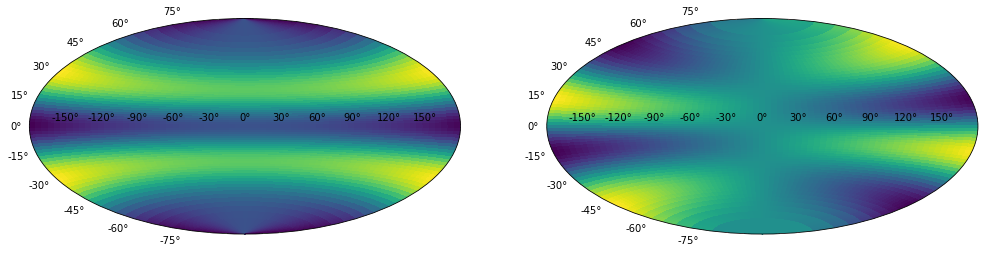

In [17]:
fig, ax = plt.subplots(ncols=2,figsize=(17,6), subplot_kw={'projection': "aitoff"})
X,Y = np.meshgrid(alphas-np.pi,deltas)
ax[0].pcolormesh(X,Y,fps)
ax[1].pcolormesh(X,Y,fcs)

In [55]:
fr = 1./9.9e-5
v1 = np.arcsin(fr*(1./1800)/200.)
v2 = np.arcsin(fr*(2./1800)/200.)
print(v1,v2)

0.028062044288642195 0.0561462173353401


In [58]:
print((v2-v1)*180/np.pi)

1.6091045866908527


In [60]:
((1./1800)/200)**2 

7.71604938271605e-12

In [59]:
1/np.sqrt(1 - ((1./1800)/200)**2 * 9.9e-5)

1.0000000000000004

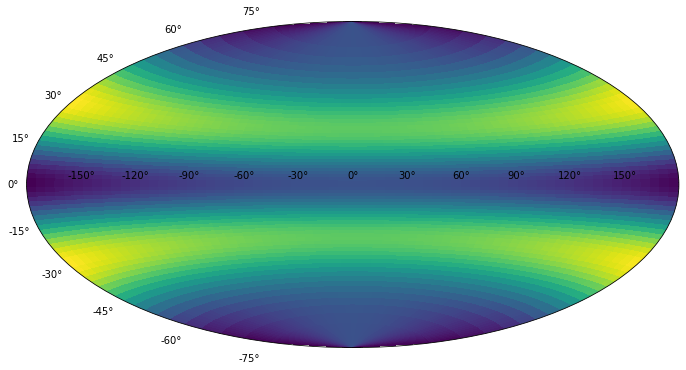

In [18]:
fig, ax = plt.subplots(ncols=1,figsize=(17,6), subplot_kw={'projection': "aitoff"})
X,Y = np.meshgrid(alphas-np.pi,deltas)
ax.pcolormesh(X,Y,fps)

In [19]:
fig.savefig("/Users/josephbayley/projects/thesis/testimg.png",dpi=10)

## Detector response

In [3]:
fp = lambda pos: 0.5*(1+np.cos(pos[1])*np.cos(pos[1]))*np.cos(2*pos[0])
fc = lambda pos: np.cos(pos[1])*np.sin(2*pos[0])

In [4]:
theta,phi = np.linspace(0,np.pi,100),np.linspace(0,2*np.pi,100)

In [5]:
THETA,PHI = np.meshgrid(theta,phi)

In [6]:
points = np.vstack([THETA.ravel(),PHI.ravel()])

In [7]:
fps = fp(points)
fcs = np.abs(fc(points))
Rp = np.reshape(fps,THETA.shape)
Rc = np.reshape(fcs,THETA.shape)

In [8]:
Xp, Yp, Zp = Rp*np.sin(PHI)*np.cos(THETA), Rp*np.sin(PHI)*np.sin(THETA), Rp*np.cos(PHI)

In [9]:
Xc, Yc, Zc = Rc*np.sin(PHI)*np.cos(THETA), Rc*np.sin(PHI)*np.sin(THETA), Rc*np.cos(PHI)

In [33]:
true_rp = np.sqrt(Xp**2 + Yp**2 + Zp**2)
normp = Normalize()
colorsp = normp(true_rp) 

true_rc = np.sqrt(Xc**2 + Yc**2 + Zc**2)
normc = Normalize()
colorsc = normc(true_rc) 

cmap = cm.get_cmap("YlGnBu")

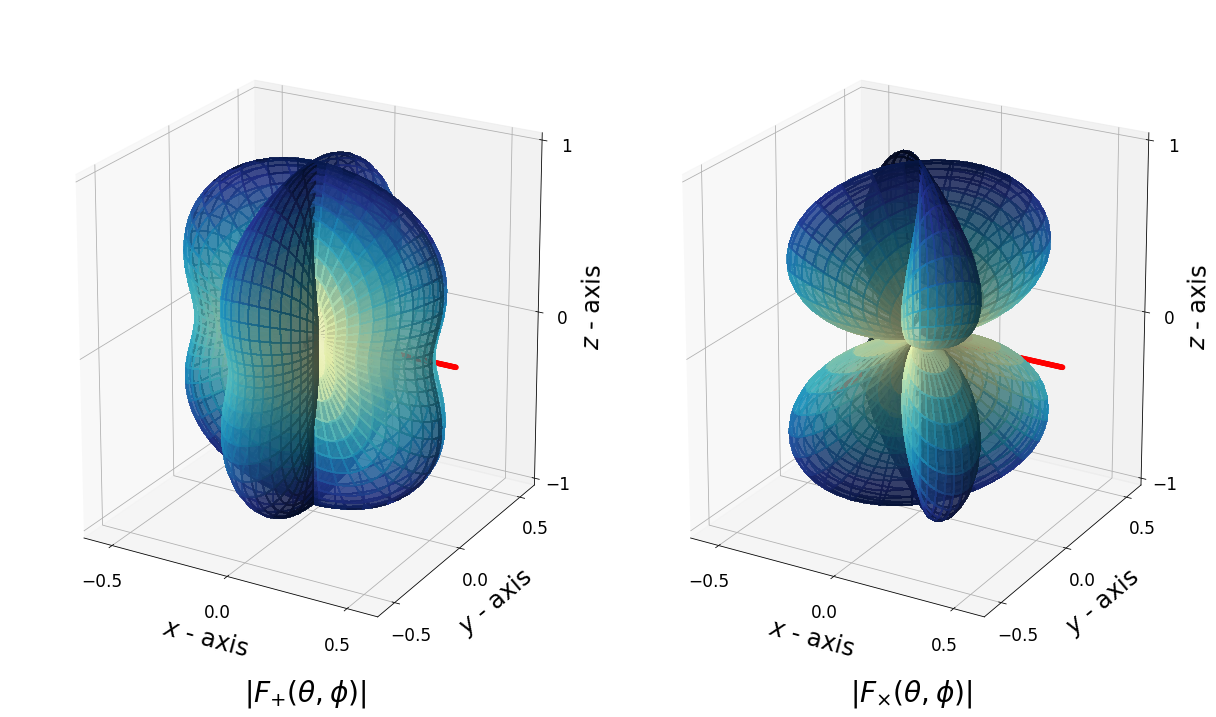

In [53]:
fig, ax = plt.subplots(figsize=(17,10),ncols = 2,subplot_kw={'projection': "3d"})

ax[0].view_init(20,-60)
ax[1].view_init(20,-60)

ax[0].plot_surface(Xp,Yp,Zp, antialiased=False, alpha=0.6,label=r"$F_{+}(\theta,\phi)$",facecolors=cmap(colorsp),zorder=0)
ax[1].plot_surface(Xc,Yc,Zc, antialiased=False, alpha=0.6,label=r"$F_{\times}(\theta,\phi)$",facecolors=cmap(colorsc),zorder=10)
#ax[0].plot_wireframe(Xp,Yp,Zp,alpha=0.3)
#ax[1].plot_wireframe(Xc,Yc,Zc,alpha=0.3)



for i in [0,1]:
    
    ax[i].set_xlim([-0.6,0.6])
    ax[i].set_ylim([-0.6,0.6])
    ax[i].set_zlim([-1,1])
    
    ax[i].scatter(np.zeros(200),np.linspace(-0.6,0,200),np.zeros(200),color="r",label="Interferometer arms",zorder=1)
    ax[i].scatter(np.linspace(0,0.6,200),np.zeros(200),np.zeros(200),color="r",zorder=0)

    ax[i].set_xlabel(r"$x$ - axis",labelpad=20)
    ax[i].set_ylabel(r"$y$ - axis",labelpad=20)
    ax[i].set_zlabel(r"$z$ - axis",labelpad=20)

    ax[i].set_xticks([-0.5, 0, 0.5])
    ax[i].set_yticks([-0.5, 0, 0.5])
    ax[i].set_zticks([-1, 0, 1])
    
    ax[i].tick_params(axis='both', which='major', pad=10)
    
ax[0].set_title(r"$|F_{+}(\theta,\phi)|$", y=-0.04,fontsize=28)
ax[1].set_title(r"$|F_{\times}(\theta,\phi)|$", y=-0.04,fontsize=28)

fig.tight_layout()

In [51]:
fig.savefig("/Users/josephbayley/projects/thesis/C1_intro/antenna_pattern.pdf",format="pdf",bbox_inches="tight")